In [60]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import copy
import animatplot as amp

In [37]:
def findneighbours(size, array):

    Nn = np.zeros(shape = (size,size))#number of neighbours

    for i in range(size):

        for j in range(size):

            Nn[i,j] = np.sum( [

                array[i-1, j-1], 
                array[i, j-1], 
                array[i+1-size*(i==size-1), j-1],

                array[i-1, j],
                array[i+1-size*(i==size-1), j],

                array[i-1, j+1-size*(j==size-1)],
                array[i, j+1-size*(j==size-1)],
                array[i+1-size*(i==size-1), j+1-size*(j==size-1)]                    

            ])

    return Nn

In [33]:
def applyrules(size,Nn, array):
    for i in range(size):
        for j in range(size):
            if array[i,j]==1:
                if Nn[i,j] < 2:# Any live cell with fewer than two live neighbours dies, as if by underpopulation.
                    array[i] = 0
                elif (Nn[i,j] == 2) or (Nn[i,j] == 3):# Any live cell with two or three live neighbours lives on to the next generation.
                    pass
                elif Nn[i,j] > 3:# Any live cell with more than three live neighbours dies, as if by overpopulation.
                    array[i,j] = 0
            else:
                if Nn[i,j] == 3:# Any dead cell with exactly three live neighbours becomes a live cell, as if by reproduction.
                    array[i,j] = 1


In [21]:
def plotarray(x):
    fig = plt.figure(figsize=[5,5])

    ax = plt.subplot(3,3,1)

    plt.pcolor(x, cmap = 'Greys')

    plt.grid(snap = 0)

    plt.xticks([1,2,3])
    plt.yticks([1,2,3])

    ax.axes.xaxis.set_ticklabels([])
    ax.axes.yaxis.set_ticklabels([])

    ax.tick_params(axis=u'both', which=u'both',length=0)

    plt.show();

In [22]:
size = 4

array = np.zeros(shape = (size,size))



In [42]:
#block 
array[1:size-1, 1:size-1] = 1
array = array.astype(int)

<IPython.core.display.Javascript object>


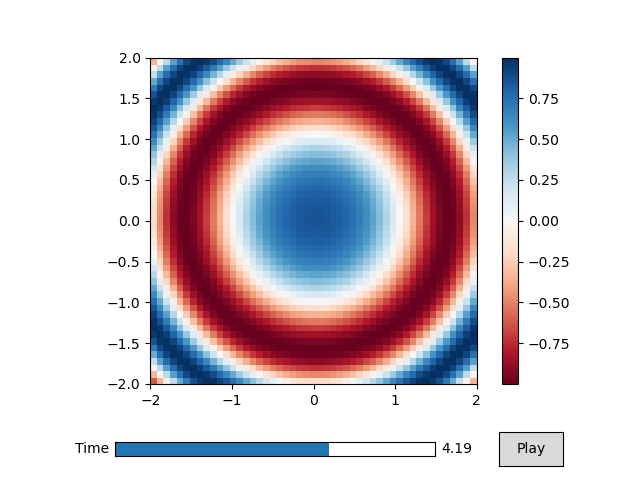

/Users/Jonny/miniconda3/lib/python3.8/site-packages/animatplot/blocks/image_like.py:71: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  self.quad = self.ax.pcolormesh(self.X, self.Y, self.C[Slice], **kwargs)


In [65]:
x = np.linspace(-2, 2, 50)
y = np.linspace(-2, 2, 50)
t = np.linspace(0, 2*np.pi, 40)

X, Y, T = np.meshgrid(x, y, t)

Z = np.sin(X*X+Y*Y-T)

block = amp.blocks.Pcolormesh(X[:,:,0], Y[:,:,0], Z, t_axis=2, cmap='RdBu')
plt.colorbar(block.quad)
plt.gca().set_aspect('equal')

anim = amp.Animation([block], amp.Timeline(t))

anim.controls()

anim.save_gif('pcolormesh')
plt.show()
